## 0. Linear Regression (Recap)

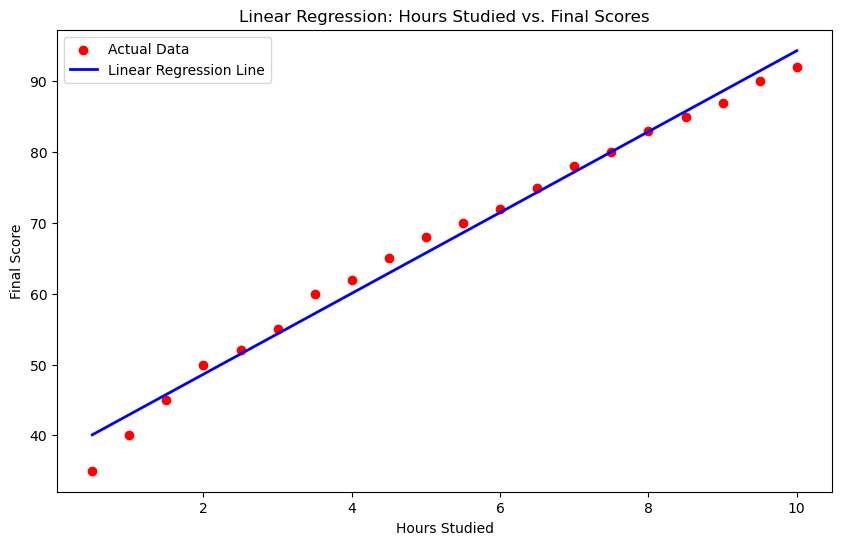

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: Hours studied vs. Final scores
hours_studied = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]).reshape(-1, 1)
final_scores = np.array([35, 40, 45, 50, 52, 55, 60, 62, 65, 68, 70, 72, 75, 78, 80, 83, 85, 87, 90, 92])
#### train split
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(hours_studied, final_scores)
predicted_scores = linear_model.predict(hours_studied)

# Scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(hours_studied, final_scores, color='red', label='Actual Data')
plt.plot(hours_studied, predicted_scores, color='blue', linewidth=2, label='Linear Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Final Score')
plt.title('Linear Regression: Hours Studied vs. Final Scores')
plt.legend()
plt.show()


### Understanding Mean Squared Error (MSE) and R-squared in This Use Case

The simplest way to think about it is:

- **MSE** tells you the absolute magnitude of the model's prediction error. It answers:  
    *"On average, how far off are my predictions?"*

- **R-squared** tells you the relative explanatory power of the model. It answers:  
    *"How much of the real-world variation does my model actually capture?"*

Let's use an analogy. Imagine you're giving driving directions to a friend:

- **MSE** is like saying: *"My directions caused you to be, on average, 50 meters away from each turn."* This is an absolute measure of error.
- **R-squared** is like saying: *"My directions explained 98% of the variation in the route."* This tells you how well the directions accounted for the overall journey, contextualizing the error. A 50-meter error is trivial on a 100km journey (high R²) but a disaster on a 500m journey (low R²).

In the context of our linear regression model (predicting final scores from hours studied), MSE quantifies the average squared difference between the actual scores (`final_scores`) and the predicted scores (`predicted_scores`). R-squared tells us how much of the variation in students' final scores can be explained by the number of hours they studied.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(final_scores, predicted_scores)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(final_scores, predicted_scores)
print(f"R-squared: {r2:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"- The MSE of {mse:.2f} indicates the average squared difference between the actual and predicted scores.")
print(f"- The R-squared value of {r2:.4f} shows that the model explains {r2*100:.2f}% of the variance in final scores based on hours studied.")

Mean Squared Error (MSE): 3.62
R-squared: 0.9868

Interpretation:
- The MSE of 3.62 indicates the average squared difference between the actual and predicted scores.
- The R-squared value of 0.9868 shows that the model explains 98.68% of the variance in final scores based on hours studied.


---

## 1. From Linear to Logistic Regression

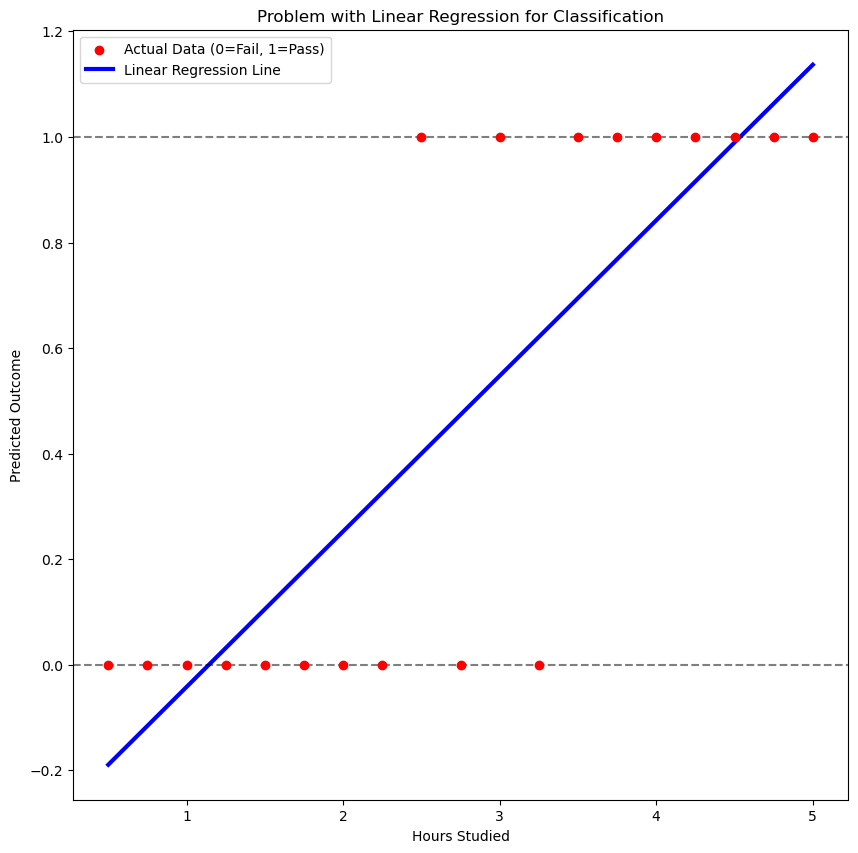

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: Hours studied vs. Pass/Fail
hours_studied = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]).reshape(-1, 1)
pass_fail = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(hours_studied, pass_fail)
line = linear_model.predict(hours_studied)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(hours_studied, pass_fail, color='red', zorder=20, label='Actual Data (0=Fail, 1=Pass)')
plt.plot(hours_studied, line, color='blue', linewidth=3, label='Linear Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Predicted Outcome')
plt.title('Problem with Linear Regression for Classification')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axhline(y=1, color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## Introduction to Logistic Regression

**Logistic Regression** is a statistical method used for binary classification problems—where the goal is to assign each input to one of two possible categories. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that an input belongs to a particular class.

### The Logistic (Sigmoid) Function

At the heart of logistic regression is the **logistic function**, also known as the **sigmoid function**. This function takes any real-valued number and maps it to a value between 0 and 1, making it ideal for modeling probabilities.

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z$ is the output of a linear equation:

$$
z = w_0 + w_1 x
$$

- $w_0$ is the intercept (bias)
- $w_1$ is the coefficient (weight)
- $x$ is the input feature (e.g., hours studied)

### From Probability to Classification

The output of the sigmoid function, $\sigma(z)$, represents the probability that the input belongs to the positive class (e.g., "Pass"). To make a final decision, we use a threshold—commonly 0.5:

- If $\sigma(z) \geq 0.5$, classify as **Pass** (1)
- If $\sigma(z) < 0.5$, classify as **Fail** (0)

### Application: Predicting Pass/Fail from Study Hours

In our example, we use logistic regression to predict whether a student will **pass** or **fail** based on the number of hours they studied. The model learns the relationship between study hours and exam outcomes, and then uses the sigmoid function to estimate the probability of passing. By applying the threshold, we can automatically classify each student as passing or failing.

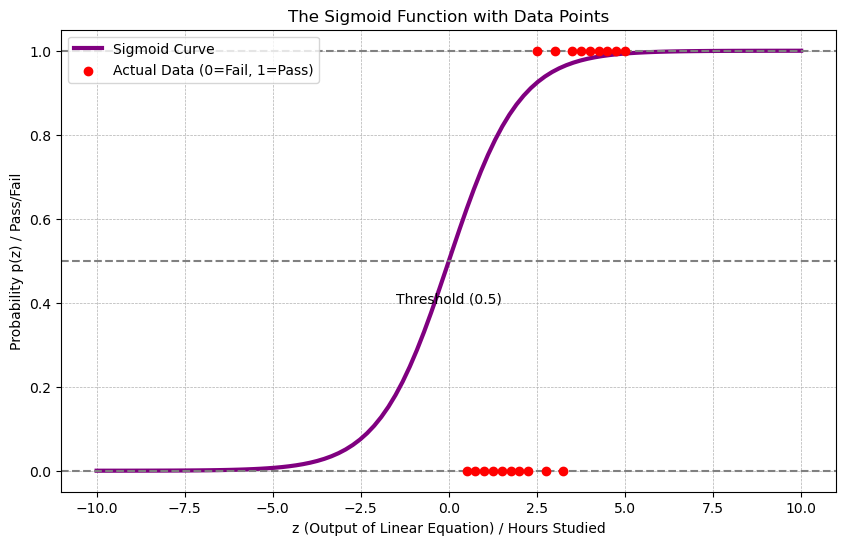

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Data for hours studied and pass/fail
hours_studied = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5])
pass_fail = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, p, color='purple', linewidth=3, label='Sigmoid Curve')
plt.scatter(hours_studied, pass_fail, color='red', zorder=20, label='Actual Data (0=Fail, 1=Pass)')
plt.xlabel('z (Output of Linear Equation) / Hours Studied')
plt.ylabel('Probability p(z) / Pass/Fail')
plt.title('The Sigmoid Function with Data Points')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')
plt.text(0, 0.4, 'Threshold (0.5)', ha='center')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

No matter what the input ($z$) is, the output (the probability) is always between 0 and 1. This S-curve is what the model learns to fit to our data.


---

## 2. An Introduction to Statistical Classification

So, what exactly is **classification**? It's the process of taking an input and assigning it to a specific category or **class**.

Think of it as sorting. You're given a piece of fruit and you have to decide if it's an 'Apple', 'Banana', or 'Orange'. In machine learning, we build a model, called a **classifier**, to do this sorting for us automatically.

### Key Terminology
 - **Classifier**: The algorithm or model that performs the classification (e.g., Logistic Regression).
 - **Features**: The input variables used to make the decision. For our fruit example, features could be `color`, `shape`, and `weight`.
 - **Classes** (or Labels): The categories we are trying to predict (e.g., 'Apple', 'Banana', 'Orange').
 - **Decision Boundary**: An imaginary line or surface that separates the different classes. The classifier learns this boundary from the data.

Let's visualize a simple decision boundary. Imagine we want to classify dots into two groups, blue and yellow, based on their x and y coordinates.

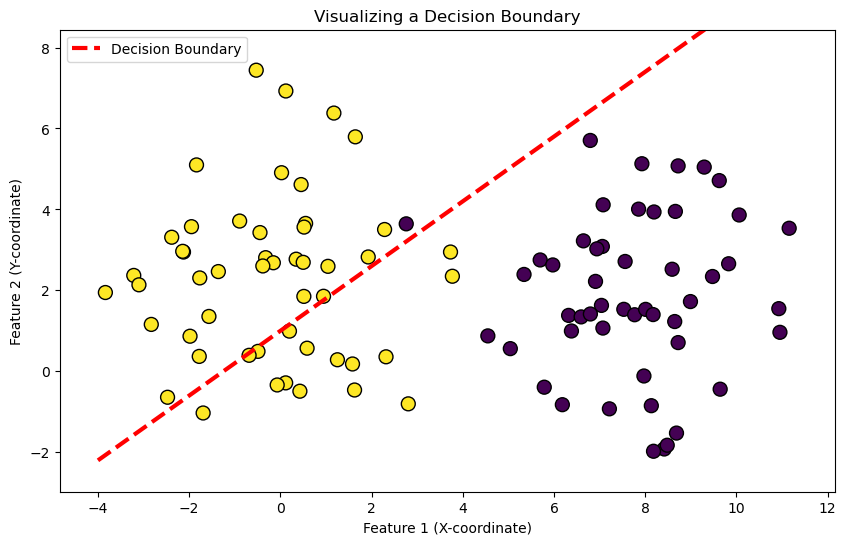

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate simple, linearly separable data
X, y = make_blobs(n_samples=100, centers=[(8, 2), (0, 2)], n_features=2, random_state=42, cluster_std=2)

# A simple decision boundary (we can just draw a line for this example)
x_decision = np.linspace(-4, 12, 100)
y_decision = 0.8 * x_decision + 1 # A manually chosen line for illustration

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.plot(x_decision, y_decision, color='red', linestyle='--', linewidth=3, label='Decision Boundary')
plt.xlabel('Feature 1 (X-coordinate)')
plt.ylabel('Feature 2 (Y-coordinate)')
plt.title('Visualizing a Decision Boundary')
plt.legend()
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()

In the plot above, the classifier's job is to find the best possible red dashed line to separate the purple dots from the yellow dots. Any new dot that falls on one side of the line will be classified as purple, and any dot on the other side will be classified as yellow. The machine learning algorithm's goal is to learn the optimal position for this line based on the training data.

---

## 3. Statistical Classification using Logistic Regression

Now, let's connect the two concepts. How do we get from the probabilities of Logistic Regression to a final classification like 'Pass' or 'Fail'?

### From Probability to Decision: The Threshold

We use a **decision threshold**. It's a simple rule:

> If the predicted probability from our sigmoid function is greater than or equal to a certain value (usually 0.5), we classify the sample as belonging to Class 1. Otherwise, we classify it as Class 0.

 - `p(X) >= 0.5`  ➡️  Classify as 1 (e.g., 'Pass', 'Is Obese', 'Spam')
 - `p(X) < 0.5`   ➡️  Classify as 0 (e.g., 'Fail', 'Is Not Obese', 'Not Spam')

That's it! The logistic regression model finds the best S-curve, and we use a 0.5 probability cutoff to make the final call.

### Putting It All Together in Python 🐍

Let's use our 'hours studied' vs. 'pass/fail' example and build a proper classifier with Python's most popular machine learning library, `scikit-learn`.

Let's examine a student who studied for 2.6 hours:
Probability of Failing (Class 0) vs. Passing (Class 1): [0.60846302 0.39153698]
Since 0.39 is > 0.5, the final classification is: 0 (Pass)

Model Accuracy on the training data: 89.47%


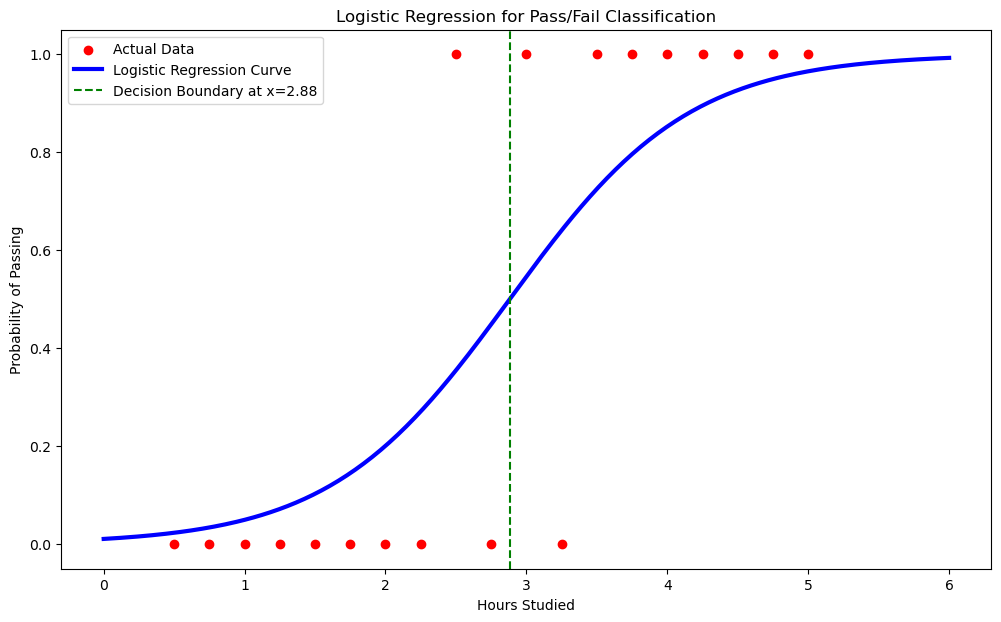

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Use the same dataset
hours_studied = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]).reshape(-1, 1)
pass_fail = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# For a more robust evaluation, we should split our data, but for this simple example, we'll train and test on the same data.

# Step 3: Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(hours_studied, pass_fail)

# Step 4: Make predictions
# First, let's see the probabilities
# We will predict probabilities for the training data
# This will give us the probability of passing (class 1) for each hour studied
probabilities = log_reg.predict_proba(hours_studied)

# Then, let's see the final classifications (based on a 0.5 threshold)
# This will give us the predicted class (0 or 1) for each hour studied
predictions = log_reg.predict(hours_studied)

print("Let's examine a student who studied for 2.6 hours:")
study_time_example = np.array([[2.6]])
# Predict the probability and class for this example
# This will give us the probability of passing (class 1) for 2.6 hours studied
prob_example = log_reg.predict_proba(study_time_example)
# This will give us the predicted class (0 or 1) for 2.6 hours studied
pred_example = log_reg.predict(study_time_example)

print(f"Probability of Failing (Class 0) vs. Passing (Class 1): {prob_example[0]}")
print(f"Since {prob_example[0][1]:.2f} is > 0.5, the final classification is: {pred_example[0]} (Pass)")

# Step 5: Evaluate the model
accuracy = accuracy_score(pass_fail, predictions)
print(f"\nModel Accuracy on the training data: {accuracy * 100:.2f}%")

# Step 6: Visualize the result
plt.figure(figsize=(12, 7))
plt.scatter(hours_studied, pass_fail, color='red', zorder=20, label='Actual Data')

# Plot the sigmoid curve
x_test = np.linspace(0, 6, 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_test)[:, 1] # Probability of class 1
plt.plot(x_test, y_prob, color='blue', linewidth=3, label='Logistic Regression Curve')

# Plot the decision boundary
# The decision boundary is where the probability of passing is 0.5
# We can find this by solving the equation: 0.5 = 1 / (1 + exp(-(w*x + b)))
# log_reg.intercept_[0] is the bias (intercept) term of the logistic regression model.
# It represents the value of the linear model's output when all input features are zero.
# In the decision boundary equation, it helps determine where the probability crosses 0.5.
# log_reg.coef_[0][0] is the weight (coefficient) assigned to the 'hours_studied' feature by the logistic regression model.
# It represents how much the log-odds of passing change for each additional hour studied.
boundary = -log_reg.intercept_[0] / log_reg.coef_[0][0]
plt.axvline(x=boundary, color='green', linestyle='--', label=f'Decision Boundary at x={boundary:.2f}')

plt.ylabel('Probability of Passing')
plt.xlabel('Hours Studied')
plt.title('Logistic Regression for Pass/Fail Classification')
plt.legend()
plt.show()
###3 Test error

Average Log Loss: 0.2754


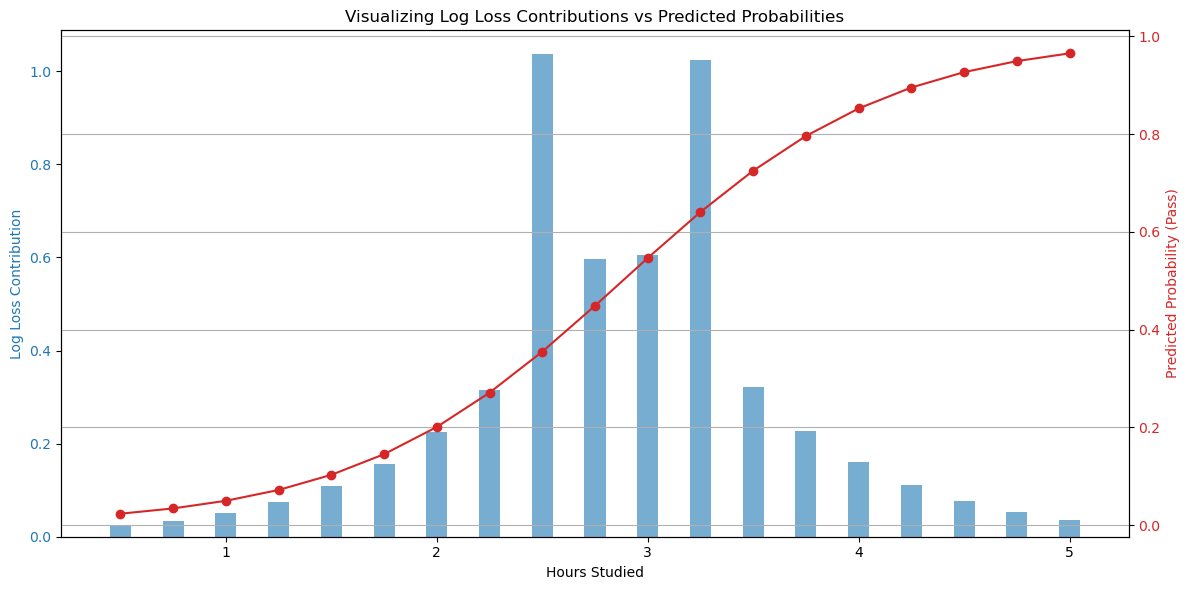

 Hours Studied  Actual Label (Pass=1)  Predicted Probability  Log Loss Contribution
          0.50                      0               0.023367               0.023644
          0.75                      0               0.034194               0.034792
          1.00                      0               0.049783               0.051065
          1.25                      0               0.071950               0.074670
          1.50                      0               0.102918               0.108608
          1.75                      0               0.145131               0.156807
          2.00                      0               0.200782               0.224122
          2.25                      0               0.271008               0.316093
          2.50                      1               0.354889               1.035949
          2.75                      0               0.448751               0.595569
          3.00                      1               0.546411               0

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Step 2: Dataset
hours_studied = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]).reshape(-1, 1)
pass_fail = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# Step 3: Train logistic regression
model = LogisticRegression()
model.fit(hours_studied, pass_fail)

# Step 4: Predict probabilities
pred_probs = model.predict_proba(hours_studied)[:, 1]

# Step 5: Calculate log loss for each sample manually
individual_log_loss = -(pass_fail * np.log(pred_probs) + (1 - pass_fail) * np.log(1 - pred_probs))

#################################################################################################
#   Error Analysis and Visualization
#   lost = -(y *  log(p)        +             (1 - y) * log(1 - p))
#   lets say that the student actually passed the exam thats means that the value of y = 1 
#   and the predicted probability of passing is 0.99, then the log loss for this sample would be:   
#   log_loss = -(1 * log(0.99)   +    (1 - 1) * log(1 - 0.99)) 
#   log_loss = -log(0.99)        +            0    =       0.01005
#  Now lest say that the student actually failed the exam, which means that the value of y = 0
#   and the predicted probability of passing is 0.01, then the log loss for this sample would be:
#   log_loss = -(0 * log(0.01)   +    (1 - 0) * log(1 - 0.01))
#   log_loss =         0         +    -log(0.99) =        0.01005 
# 
# 
# 
################################################################################################### 


#Step 6: Average log loss
avg_log_loss = log_loss(pass_fail, pred_probs)
print(f"Average Log Loss: {avg_log_loss:.4f}")

# Step 7: Create DataFrame for visualization
df = pd.DataFrame({
    'Hours Studied': hours_studied.flatten(),
    'Actual Label (Pass=1)': pass_fail,
    'Predicted Probability': pred_probs,
    'Log Loss Contribution': individual_log_loss
}).sort_values('Hours Studied')

# Step 8: Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for log loss per sample
color1 = 'tab:blue'
ax1.set_xlabel('Hours Studied')
ax1.set_ylabel('Log Loss Contribution', color=color1)
ax1.bar(df['Hours Studied'], df['Log Loss Contribution'], color=color1, alpha=0.6, label='Log Loss Contribution', width=0.1)
ax1.tick_params(axis='y', labelcolor=color1)

# Line plot for predicted probabilities
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Predicted Probability (Pass)', color=color2)
ax2.plot(df['Hours Studied'], df['Predicted Probability'], color=color2, marker='o', label='Predicted Probability')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Visualizing Log Loss Contributions vs Predicted Probabilities")
fig.tight_layout()
plt.grid(True)
plt.show()

# Step 9 (Optional): Print or save table
print(df.to_string(index=False),'\n')
print('The total log loss is the average of the individual contributions, which is:', avg_log_loss)


---

## 4. Log-Loss Function (a.k.a. Cross Entropy Loss)

### Introduction to Log-Loss (Cross Entropy Loss)

**Log-loss**, also known as **cross-entropy loss**, is the standard loss function used for evaluating the performance of classification models that output probabilities, such as logistic regression.

Log-loss measures how well the predicted probabilities match the actual class labels. It penalizes confident and incorrect predictions much more than less confident or correct ones.

#### The Formula

For a single binary classification example, the log-loss is defined as:

$$
\text{LogLoss} = -\left[ y \cdot \log(p) + (1 - y) \cdot \log(1 - p) \right]
$$

Alternatively, it can be written as a piecewise function:

$$
\text{loss}(\mathbf{w}) = 
\begin{cases}
-\log(P(y=1)), & y=1 \\
-\log(1 - P(y=1)), & y=0
\end{cases}
$$

- $y$ is the true label (0 or 1)
- $p$ is the predicted probability that $y = 1$

For a dataset with $N$ samples, the average log-loss is:

$$
\text{LogLoss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
$$

#### Key Points

- If the model predicts a probability close to the true label, the loss is low.
- If the model is confident but wrong (e.g., predicts $p=0.99$ when $y=0$), the loss is very high.
- Log-loss is always non-negative, and lower values indicate better model performance.

Log-loss encourages models to output probabilities that reflect true likelihoods, not just correct classifications. This makes it especially useful for probabilistic classification tasks.

In [15]:
def log_loss(y_true, y_prob):
    """
    Compute the log-loss (cross-entropy loss) for binary classification.

    Parameters:
    y_true (np.ndarray): True binary labels (0 or 1).
    y_prob (np.ndarray): Predicted probabilities for class 1.

    Returns:
    float: Log-loss value.
    """
    # Clip probabilities to avoid log(0)
    eps = 1e-15
    y_prob = np.clip(y_prob, eps, 1 - eps)
    loss = -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))
    return loss

# Example usage with the logistic regression use case:
# y_true: pass_fail
# y_prob: probabilities of class 1 from the logistic regression model
# (Assuming 'probabilities' variable from previous logistic regression cell)
logloss_value = log_loss(pass_fail, probabilities[:, 1])
print(f"Log-loss (Cross Entropy Loss): {logloss_value:.4f}")


Log-loss (Cross Entropy Loss): 0.2754


In [16]:
print("\nInterpretation of Log-loss:")
print(f"- The log-loss value of {logloss_value:.4f} quantifies how well the predicted probabilities from our logistic regression model match the actual pass/fail outcomes.")
print("- A lower log-loss indicates that the model's predicted probabilities are close to the true labels, meaning the model is well-calibrated and confident in its correct predictions.")
print("- In this case, the log-loss is quite low, suggesting that our model is making accurate and reliable probability estimates for student outcomes.")


Interpretation of Log-loss:
- The log-loss value of 0.2754 quantifies how well the predicted probabilities from our logistic regression model match the actual pass/fail outcomes.
- A lower log-loss indicates that the model's predicted probabilities are close to the true labels, meaning the model is well-calibrated and confident in its correct predictions.
- In this case, the log-loss is quite low, suggesting that our model is making accurate and reliable probability estimates for student outcomes.


### Summary

We have walked through a complete, end-to-end machine learning workflow.

1.  **We understood the theory**: We learned that Logistic Regression uses the Sigmoid function to model the probability of a binary outcome.
2.  **We defined the task**: We framed our problem as a Statistical Classification task—sorting students into 'Pass' or 'Fail'.
3.  **We implemented the solution**: We used `scikit-learn` to train a model that learned the relationship between study hours and exam outcomes. This model learned the best S-curve to fit the data.
4.  **We made predictions**: We saw how the model outputs a continuous probability, and how applying a 0.5 decision threshold turns that probability into a discrete classification.

This fundamental process of **modeling probability** and then **using a threshold to classify** is a cornerstone of many advanced machine learning techniques.